## Reading data 
From the text file


In [43]:
#!/bin/python
import re

structure_text_file='structures.txt'
samples=dict()

with open(structure_text_file,'r') as fh:
    lines =fh.readlines()     

## Creating Python Dictionary
from data already read off the text file

In [44]:
name=''
count=0
for line in lines:
    
    if line.startswith('/'):
        count=count+1
        name=line.split('/')[-1].strip().split('.')[0].strip()
        samples[count]=dict()
        samples[count]['name']=name
        
    else:
        key,value=line.split("=")
        samples[count][key]=value.strip()
        
        

##  Data preprocessing
1. Removing likely unrelated data.
2. Re-ordering independent and result parameter

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 40)
df1=pd.DataFrame.from_dict(samples,orient='index')
df1.reset_index(drop=True, inplace=True)
df1=df1.drop(['name','Box volume ','Strain ','Displacement (x & y) ','Displacement (z) '],axis=1) # removing  unrelated data
df1['id'] = range(1, len(df1) + 1)
df1.head()



,Mesh volume,Rho,C11,C22,C33,C12,C13,C23,C44,C55,...,E1,E2,E3,nu12,nu13,nu23,mu23,mu13,mu12,id
0,345322.7689798011,0.043165346122475134,0.11035552355957358,0.09331165897852606,0.09504280902015454,0.05278984171587961,0.052062701007787655,0.048629559682231656,0.8232323361468934,0.0473408834742925,...,0.0718423758865318,0.06007298897043067,0.06221081931295994,0.38216439715640765,0.3522435310255481,0.34859099707052454,0.8232323361468934,0.0473408834742925,0.04888035506201445,1
1,357365.46845682024,0.044670683557102527,0.10617143949810734,0.09918641985748405,0.10736234663811096,0.049312284638048584,0.05328893997978546,0.04614831561875709,0.08628384612909565,0.22490776562387066,...,0.07093383220596787,0.07060329226099511,0.07461367605320639,0.3327872571460019,0.3533023428685621,0.28050572845183924,0.08628384612909565,0.22490776562387066,0.39394490995706727,2
2,360372.69797348813,0.04504658724668602,0.07193354729955323,0.08929505164845775,0.07828078474646538,0.0458720520574417,0.0318038593428175,0.03450355632019318,0.03694857299425585,0.400647691389732,...,0.04531657511011215,0.05689272910555098,0.06085058599165685,0.42995339569785185,0.21677015878490621,0.23686955147974376,0.03694857299425585,0.400647691389732,0.4130484399163377,3
3,345322.7689798011,0.043165346122475134,0.11361766771302749,0.0938024670913367,0.0955587273541434,0.052272525096486507,0.05042781240763302,0.04772399864538084,0.8232323361468934,0.0473408834742925,...,0.0765192029683098,0.0615347949933416,0.06455512431582351,0.38714541089421395,0.3343670036975093,0.35157473622316593,0.8232323361468934,0.0473408834742925,0.04888035506201445,4
4,357365.46845682024,0.044670683557102527,0.10617143949810734,0.09918641985748405,0.10736234663811096,0.049312284638048584,0.05328893997978546,0.04614831561875709,0.08628384612909565,0.22490776562387066,...,0.07093383220596787,0.07060329226099511,0.07461367605320639,0.3327872571460019,0.3533023428685621,0.28050572845183924,0.08628384612909565,0.22490776562387066,0.39394490995706727,5


## Aspect Ratio Data from xlsx


In [46]:
# ! pip install openpyxl
df2=pd.read_excel('AR_per_structure.xlsx')
df2=df2.dropna(axis=1,how='all')
df2=df2.dropna(axis=0,how='all')
df2.columns = df2.iloc[0]
df2 = df2[1:]
df2['id'] = range(1, len(df2) + 1)
df2 = df2.loc[:, df2.columns.notna()]
df2.reset_index(drop=True, inplace=True)
df2 = df2.rename_axis(None, axis=1)
df2.head()



,a,b,AR,id
0,13.840443,0.241912,3.348169,1
1,14.079122,0.235956,3.322047,2
2,13.869349,0.244432,3.390113,3
3,15.818883,0.21378,3.381758,4
4,13.677275,0.244578,3.345158,5


## Creating the dataframe for analysis from originals 

In [47]:
# df = df1[['Mesh volume ', 'Rho ', 'C11 ', 'C22 ', 'C33 ', 'C12 ', 'C13 ', 'C23 ', 'C44 ', 'C55 ', 'C66 ', 'nu12 ', 'nu13 ', 'nu23 ','mu23 ', 'mu13 ', 'mu12 ', 'E1 ', 'E2 ', 'E3 ']]
#df = df1[[ 'C22 ', 'C33 ', 'nu12 ', 'nu13 ', 'nu23 ','mu23 ', 'mu13 ', 'mu12 ', 'E1 ']]
df1= df1[['Mesh volume ', 'Rho ', 'C11 ',  'E1 ','E2 ']]
df_input=pd.concat([df1,df2],axis=1)
# df_input = df_input[['Mesh volume ', 'a','b', 'Rho ','E1 ']]
df = df_input
df

,Mesh volume,Rho,C11,E1,E2,a,b,AR,id
0,345322.7689798011,0.043165346122475134,0.11035552355957358,0.0718423758865318,0.06007298897043067,13.840443,0.241912,3.348169,1
1,357365.46845682024,0.044670683557102527,0.10617143949810734,0.07093383220596787,0.07060329226099511,14.079122,0.235956,3.322047,2
2,360372.69797348813,0.04504658724668602,0.07193354729955323,0.04531657511011215,0.05689272910555098,13.869349,0.244432,3.390113,3
3,345322.7689798011,0.043165346122475134,0.11361766771302749,0.0765192029683098,0.0615347949933416,15.818883,0.21378,3.381758,4
4,357365.46845682024,0.044670683557102527,0.10617143949810734,0.07093383220596787,0.07060329226099511,13.677275,0.244578,3.345158,5
5,360372.69797348813,0.04504658724668602,0.07193354729955323,0.04531657511011215,0.05689272910555098,14.604582,0.227781,3.326645,6
6,350324.27852909366,0.043790534816136706,0.04628131216183741,0.13030635658826487,-0.1264893830594989,14.173493,0.235785,3.341901,7
7,350510.07991892565,0.043813759989865704,0.10891217367182912,0.08130993123366873,0.08520404474291766,15.023196,0.225627,3.389641,8
8,328475.87141507457,0.04105948392688432,0.09769624570059991,0.06837748326200302,0.10696619405545668,15.130287,0.218169,3.300965,9
9,375994.1680338979,0.04699927100423724,0.07453206038233931,0.03668026258246856,0.08512233212395523,13.218859,0.250039,3.30523,10


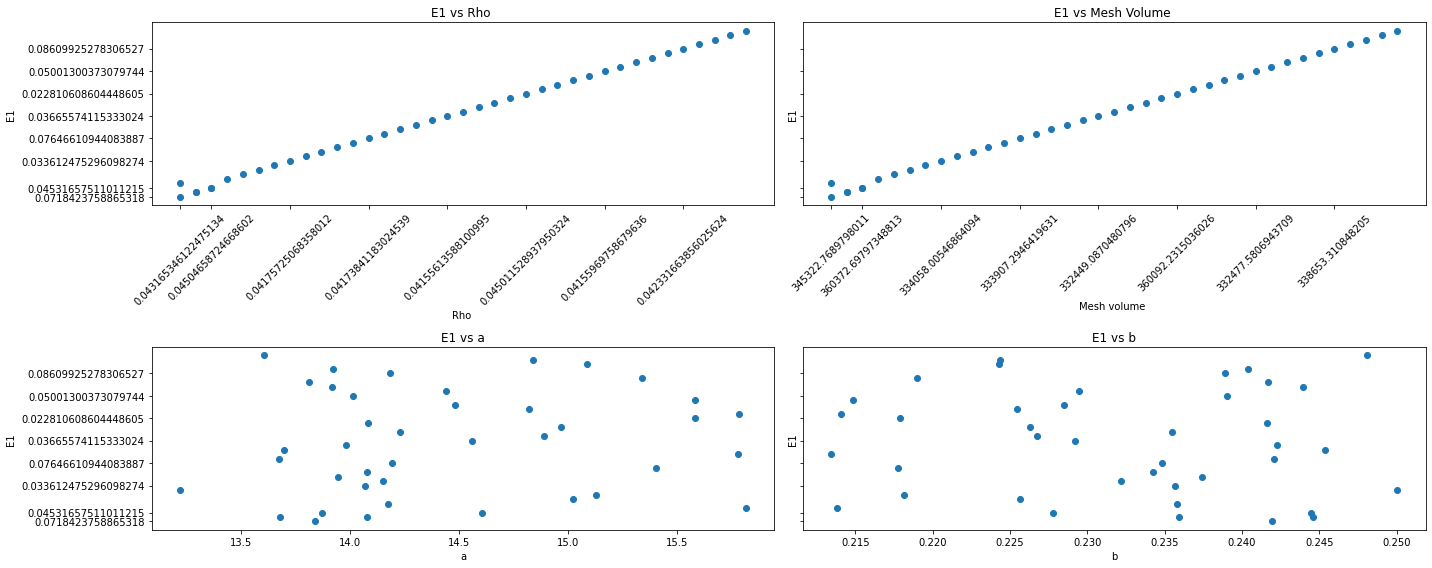

In [48]:

# First set of subplot two side by side windows on same row
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)
axs[0][0].scatter(df['Rho '],df['E1 '])
axs[0][0].set_xlabel('Rho ')
axs[0][0].set_ylabel('E1 ')
axs[0][0].title.set_text('E1 vs Rho ')
axs[0][0].set_xticks(np.array(df['Rho '])[0::5])
axs[0][0].set_xticklabels(np.array(df['Rho '])[0::5],rotation=45)


axs[0][1].scatter(df['Mesh volume '],df['E1 '])
axs[0][1].set_xlabel('Mesh volume ')
axs[0][1].set_ylabel('E1 ')
axs[0][1].title.set_text('E1 vs Mesh volume ')
axs[0][1].title.set_text('E1 vs Mesh Volume ')
axs[0][1].set_xticks(np.array(df['Mesh volume '])[0::5])
axs[0][1].set_xticklabels(np.array(df['Mesh volume '])[0::5],rotation=45)


axs[1][0].scatter(df['a'],df['E1 '])
axs[1][0].set_xlabel('a')
axs[1][0].set_ylabel('E1 ')
axs[1][0].title.set_text('E1 vs a')


axs[1][1].scatter(df['b'],df['E1 '])
axs[1][1].set_xlabel('b')
axs[1][1].set_ylabel('E1 ')
axs[1][1].title.set_text('E1 vs b')


plt.rcParams['figure.figsize'] = [20, 8]
plt.yticks(np.array(df['E1 '])[0::5])



plt.show()

## Setting up regression model 

Assume E1 to be the result.
All rows left of it to be components that is analyzed

https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285

In [49]:
df = df_input[['Mesh volume ', 'a','b', 'Rho ','E1 ']]
ncol=len(df.columns)-1
X = df.iloc[:,0:ncol].values
y = df.iloc[:,ncol].values
np.shape(X),np.shape(y)



((40, 4), (40,))

# Random Forest

Index(['b', 'a', 'Mesh volume ', 'Rho '], dtype='object') [0.1878448  0.2129007  0.29234946 0.30690504]


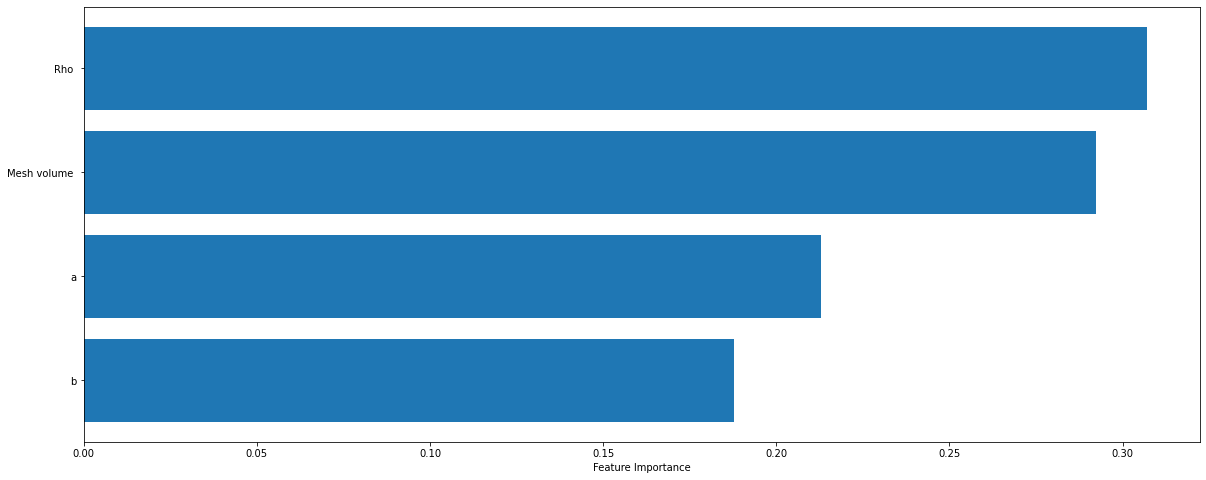

In [50]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)


rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)
sort = rf.feature_importances_.argsort()
print(df.columns[sort], rf.feature_importances_[sort])
plt.barh(df.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")
plt.rcParams['figure.figsize'] = [8, 6]
plt.show()



# Linear regression

Feature: 0, Mesh volume  Score: -1.5524506405867885e-07
Feature: 1, a Score: 0.004472414922989746
Feature: 2, b Score: 0.5123619633578774
Feature: 3, Rho  Score: -1.9409266166124043e-14


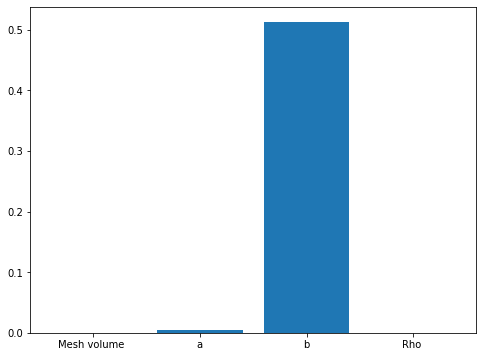

In [51]:
# linear regression feature importance
df = df[['Mesh volume ', 'a', 'b' ,'Rho ','E1 ']]
ncol=len(df.columns)-1
X = df.iloc[:,0:ncol].values
y = df.iloc[:,ncol].values
np.shape(X),np.shape(y)


scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# define the model
lr = LinearRegression()
# fit the model
lr.fit(X, y)
# get importance
importance = lr.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature: {i}, {df.columns[i]} Score: {v}')
# plot feature importance
plt.bar([df.columns[x] for x in range(len(importance))], importance)
plt.show()

# Logistic regression

Feature: 0, Mesh volume  Score: 2.924500320555063e-08
Feature: 1, a Score: 1.7401692614012098e-11
Feature: 2, b Score: -8.248072895735676e-13
Feature: 3, Rho  Score: 3.655625400693789e-15


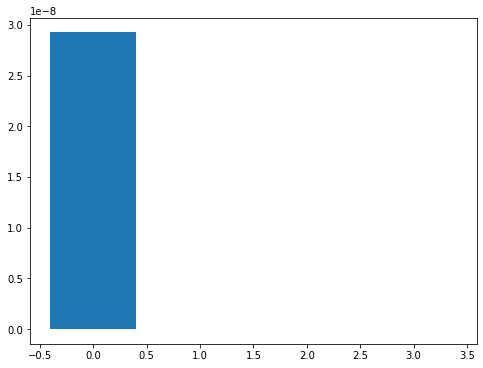

In [52]:

lgr = LogisticRegression()
# fit the model
lgr.fit(X, y)
# get importance
importance = lgr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature: {i}, {df.columns[i]} Score: {v}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Decision Tree 

Feature: 0 Mesh volume , Score: 0.2765393054025778
Feature: 1 a, Score: 0.05238878112979326
Feature: 2 b, Score: 0.15972702519911025
Feature: 3 Rho , Score: 0.5113448882685186


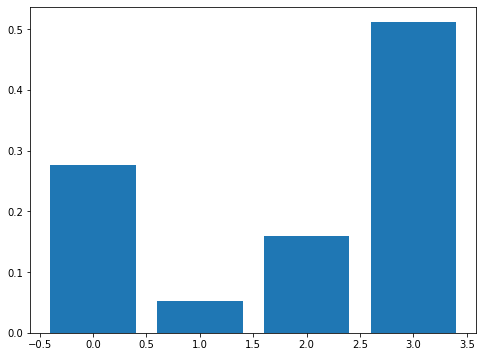

In [53]:
"""decision tree for feature importance on a regression problem"""

dtr = DecisionTreeRegressor()
# fit the model
dtr.fit(X, y)
# get importance
importance = dtr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature: {i} {df.columns[i]}, Score: {v}' )
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()



Index(['a', 'b', 'Mesh volume ', 'Rho '], dtype='object') [0.05238878 0.15972703 0.27653931 0.51134489]


Text(0.5, 0, 'Feature Importance')

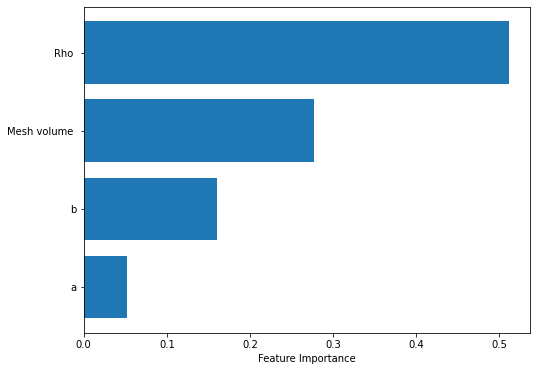

In [54]:
sort = dtr.feature_importances_.argsort()
print(df.columns[sort], dtr.feature_importances_[sort])

plt.barh(df.columns[sort], dtr.feature_importances_[sort])
plt.xlabel("Feature Importance")